In [2]:
%load_ext autoreload
%autoreload 3

In [3]:
# Add TRES to path

import sys
sys.path.append("..")

In [8]:
from amuse.units import units
from amuse.community.seba.interface import SeBa
from seculartriple_TPS.interface import SecularTriple

import numpy as np
import matplotlib.pyplot as plt

from TRES import main_developer, initialize_triple_class
from tres_setup import make_particle_sets

In [9]:
# Make the stars and binaries

inner_primary_mass = 10.0 | units.MSun
inner_secondary_mass =  8.0 | units.MSun
outer_mass = 5 | units.MSun
inner_semimajor_axis =  1.0 | units.AU
outer_semimajor_axis = 12.0 | units.AU
inner_eccentricity =  0.5
outer_eccentricity = 0.5
relative_inclination = np.pi/3
inner_argument_of_pericenter =   0.0
outer_argument_of_pericenter = 0.0
inner_longitude_of_ascending_node = 0.0

stars, bins, correct_params = make_particle_sets([inner_primary_mass, inner_secondary_mass, outer_mass],
                                                     [inner_semimajor_axis, outer_semimajor_axis],
                                                     [inner_eccentricity, outer_eccentricity],
                                                     [relative_inclination],
                                                     [inner_argument_of_pericenter, outer_argument_of_pericenter],
                                                     [inner_longitude_of_ascending_node])

In [10]:
print(stars)

                 key  initial_mass     is_donor      is_star         mass       parent
                   -         MSun         none         none         MSun         none
====================  ===========  ===========  ===========  ===========  ===========
12680313779839093419    1.000e+01        False         True    1.000e+01  14297637246665137321
10978989039604764050    8.000e+00        False         True    8.000e+00  14297637246665137321
 7334785628966770775    5.000e+00        False         True    5.000e+00  8073120004149095763
====================  ===========  ===========  ===========  ===========  ===========


In [11]:
print(bins)

                 key  accretion_efficiency_mass_transfer  accretion_efficiency_wind_child1_to_child2  accretion_efficiency_wind_child2_to_child1  argument_of_pericenter     bin_type       child1       child2  eccentricity  is_mt_stable      is_star  longitude_of_ascending_node  mass_transfer_rate       parent   part_dt_mt  semimajor_axis  specific_AM_loss_mass_transfer
                   -         none         none         none         none         none         none         none         none         none         none         none    MSun / yr         none         none           AU         none
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
14297637246665137321    1.000e+00    0.000e+00    0.000e+00    0.000e+00      unknown  12680313779839093419  10978989039604764050    5.000e-01         True        False  

In [12]:
# Initialize the stellar and secular codes

stellar_code = SeBa()
secular_code = SecularTriple()

In [13]:
# Create the triple class object

triple = initialize_triple_class(stars, bins, 
                                 correct_params, stellar_code, 
                                 secular_code)

# Set metallicity
triple.stellar_code.parameters.metallicity = 0.02

In [12]:
triple.print_stellar_system()

0
0.797678407704
binary star: 
22.999654438 [MSun]
2581.1666718 [RSun]
0.500335116703
47715.4354306
-45957.7590771
-9.2375052478 [MSun / Myr]
1.0
0.0
0.0
2.5
True
	
star:
5.0000000000 [Myr]
Main Sequence star
5.0000000000 [MSun]
2.5225884740 [RSun]
0.0000000000 [MSun]
0.0000000000 [RSun]
1.0000000000e-10 [MSun]
1.0000000000e-10 [RSun]
7.1944568517e+21 [MSun * RSun**2 * Myr**-2 / Myr]
17779.906061 [K]
-0.0000000000 [MSun / Myr]
4296578639.3 [Myr**-1]
False
	
	
binary star: 
17.999654438 [MSun]
215.09673196 [RSun]
0.930165104093
54928.5062848
-45954.6174844
-80.313241129 [MSun / Myr]
1.0
0.0
0.0
2.5
True
	
star:
5.0000000000 [Myr]
Main Sequence star
9.9996544378 [MSun]
4.0668412764 [RSun]
0.0000000000 [MSun]
0.0000000000 [RSun]
1.0000000000e-10 [MSun]
1.0000000000e-10 [RSun]
7.7595161068e+22 [MSun * RSun**2 * Myr**-2 / Myr]
25376.586954 [K]
-7.3783799789e-05 [MSun / Myr]
2343151245.1 [Myr**-1]
False
	
	
star:
5.0000000000 [Myr]
Main Sequence star
8.0000000000 [MSun]
3.4443310804 [RSun]
0

In [13]:
# Evolve the system

triple.evolve_model(10 | units.Myr)

In [15]:
triple.print_stellar_system()

0
0.97372741032
binary star: 
22.999242313 [MSun]
2581.2129240 [RSun]
0.500654264276
93691.5739051
-90626.9961368
-9.6859427118 [MSun / Myr]
1.0
0.0
0.0
2.5
True
	
star:
10.000000000 [Myr]
Main Sequence star
5.0000000000 [MSun]
2.5861750006 [RSun]
0.0000000000 [MSun]
0.0000000000 [RSun]
1.0000000000e-10 [MSun]
1.0000000000e-10 [RSun]
7.3582359184e+21 [MSun * RSun**2 * Myr**-2 / Myr]
17659.062144 [K]
-0.0000000000 [MSun / Myr]
4087895267.4 [Myr**-1]
False
	
	
binary star: 
17.999242313 [MSun]
215.09874250 [RSun]
0.896700602681
108929.182468
-90623.8545441
-104.48131461 [MSun / Myr]
1.0
0.0
0.0
2.5
True
	
star:
10.000000000 [Myr]
Main Sequence star
9.9992423131 [MSun]
4.5574480693 [RSun]
0.0000000000 [MSun]
0.0000000000 [RSun]
1.0000000000e-10 [MSun]
1.0000000000e-10 [RSun]
9.0074883554e+22 [MSun * RSun**2 * Myr**-2 / Myr]
24882.454896 [K]
-9.2143270672e-05 [MSun / Myr]
1865351141.7 [Myr**-1]
False
	
	
star:
10.000000000 [Myr]
Main Sequence star
8.0000000000 [MSun]
3.6909988504 [RSun]
0.

In [16]:
stellar_code.particles.remove_particles(stars)

In [17]:
stellar_code.stop()
secular_code.stop()

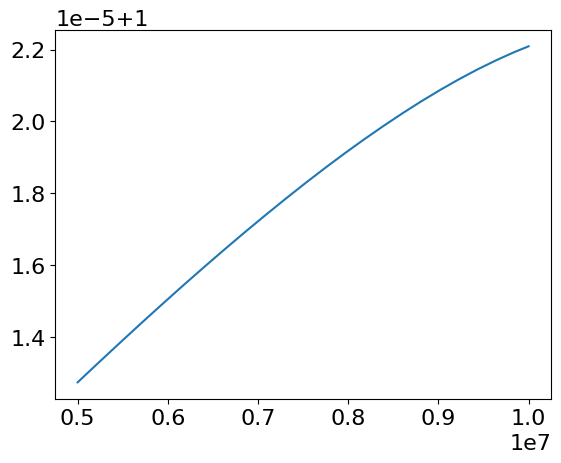

In [29]:
plt.plot(triple.plot_data.times_array.number, triple.plot_data.a_in_array.number)